COMP 215 - LAB 5 (Elementary Cellular Automata)
-----------------------------------------------
#### Name: Brayden Labossiere
#### Date: Tuesday March 12, 2024

This lab exercise is an introduction to the elementary [Cellular Automata](https://en.wikipedia.org/wiki/Elementary_cellular_automaton) studied by [Stephen Wolfram](https://en.wikipedia.org/wiki/Stephen_Wolfram#Complex_systems_and_cellular_automata).

**New Python concepts**:
  * **[NumPy](https://numpy.org)** is an open-source scientific computing package.  We will be using numpy for the remainder of the term.
  * 1D and 2D [array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) -  a rectangular grid with efficient matrix operations.

**New Computation concepts**:
  * **bit sequence** (a.k.a. binary number) - using a sequence of 0's and 1's to efficiently represent a data structure and processes.

**Credits**:
    Code examples based on [Think Complexity, 2nd edition](https://thinkcomplex.com).
    Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

As usual, the first code cell simply imports all the modules we'll be using...

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random

## CA Fundamentals
Both the textbook and our week5 notebook develop some fundamental operations for simulating Elementary CA.
Some of the code developed in class is reproduced here without deriving all the ideas - review `week05` notebook for the full story.
The sliding dot product algorithm in `rule_indexes` is implemented with [numpy.correlate](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html).  It's behaviour is identical to the derivation from class.

#### Notes
* we use `np.pad(array, 1, mode='wrap')` to pad state vector with 1 extra value at both ends, equal to the last value at the opposing end of the vector.  This strategy avoids [edge effects](https://en.wikipedia.org/wiki/Boundary_problem_(spatial_analysis)#Types_and_examples).
* since the rule is an `np.array`, we use "vector indexing" here to index a whole row at once:  `next_row=rule[indexes]`  See `foundations/numpy_1D_arrays` for details.


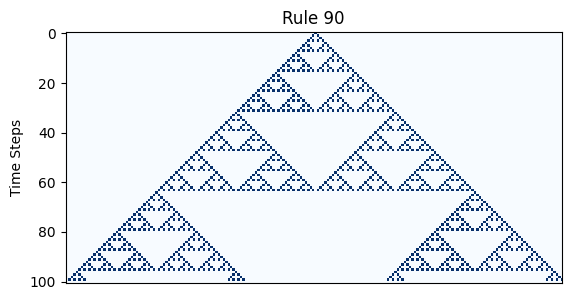

In [2]:
POWERS_OF_2 = np.array((4, 2, 1))

def rule_indexes(state):
    """ Return vector of rule indexes - one index for each 3-cell neighbourhood in the CA state vector. """
    # numpy's version of the "sliding dot product" algorithm;  "pad" ends of state array with extra 0 cell to mitigate edge effects
    return np.correlate(np.pad(state, 1, mode='constant'), POWERS_OF_2, mode='valid')

assert all( rule_indexes(np.array([1,1,0,0,1,0,0,0])) == [3, 6, 4, 1, 2, 4, 0, 0] )


def transition(state, rule):
    """ Return the vector resulting from a transition of given CA state under the given 8-bit rule """
    indexes = rule_indexes(state)
    return np.array(rule[indexes])  # "vector indexing" replaces: [rule[i] for i in indexes]

rule_110 = (0,1,1,0,1,1,1,0)[::-1]
assert all( transition(np.array((0,0,1,1,1,0,0,0,1,1,0)), np.array(rule_110)) == (0,1,1,0,1,0,0,1,1,1,0))


# This algorithm is from the textbook - it uses numpy to do a decimal to binary conversion.
def get_lookup_table(rule):
    """
    Return the 8-bit transition vector for the given elementary CA rule number.
    rule: int 0-255
    returns: transition lookup table - a 8 element vector of 0s and 1s
    """
    rule = np.array([rule], dtype=np.uint8)
    return np.unpackbits(rule)[::-1]

assert np.all( get_lookup_table(110) == rule_110 )


def single_centre_array(n_cells):
    """ Return a binary 1D array with given number of cells, all zeros except a single 1 in the centre cell """
    array = np.zeros(n_cells, dtype=np.uint8)
    array[n_cells//2] = 1
    return array

assert np.all( single_centre_array(7) == (0,0,0,1,0,0,0) )


def simulate_ca(n_cells, n_steps, rule):
    """ Generate a CA with given number of cells, plot progression of rule for given number of time steps """
    start_state = single_centre_array(n_cells)
    # create a stack of "empty" state vectors, one for each time step
    ca_timesteps = np.vstack([start_state, np.zeros((n_steps, len(start_state)), dtype=np.uint8)])
    # run the simulation
    for t in range(1, n_steps):
        ca_timesteps[t] = transition(ca_timesteps[t-1], rule)
    return ca_timesteps


def plot_ca(array, axes=None, title='', cmap='Blues', **options):
    """
    Plot the 2D array as an image on the given axes  1's will be dark blue, 0's will be light blue.

    :param axes: the axes to plot on, or None to use the `plt.gca()` (current axes)
    :param options: keyword arguments passed directly to `plt.imshow()`
           see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
    """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set(
        title=title,
        ylabel='Time Steps',
    )
    # Turn off axes labels and tick marks
    axes.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    # Defaults for displaying a "matrix" with hard-pixel boundaries and (0,0) at top-left
    options = {**dict(interpolation='nearest', origin='upper'), **options}
    axes.imshow(array, cmap=cmap, **options)

rule_90 = get_lookup_table(90)
ca_timesteps = simulate_ca(200, 100, rule_90)
plot_ca(ca_timesteps, title=f'Rule 90')

## Exercise 1: Additional Start States
In Wolfram's original experiments, he starts with a CA that is all zeros except the centre cell.
This is reproduced by the `single_centre_array` function above.
It would be interesting to experiment with other start states...

Write 2 functions, each of which returns a 1-D `numpy.array` (vector) configured in a specific state:
1. `from_string_array` takes a text string of 0's and 1's and returns a 1D array with matching integer values
2. `random_array` takes a float $ p where 0 <= p <= 1 $ as input and returns a 1D array $a$, where probability $a[i] == 1$ is $p$

*Tip*: both problems are most easily solved using list comprehensions!

In [3]:
# Solution for Ex. 1 here...

num_string = '0110010'

def from_string_array(num_string):
  """Takes the input of a string of numbers and returns a 1D array with matching integer values."""
  return [int(letter) for letter in num_string]

from_string_array(num_string)

p = 0.5
size = 7

def random_array(p):
  """Takes the input of the probability, p, in between 0 and 1 that a 1D array is 1.  Returns the 1D array as either 0 or 1."""
  a = 0
  value = np.random.rand()
  #print(value)
  if value > p:
    a = 1
  return [a]

def random_array2(p, size):
  """List comprehension version of the above function.  Takes the probability p, that a value is 1, and the size of the 1D array."""
  return [1 if p > np.random.rand() else 0 for _ in range(size)]

random_array(p)


random_array2(p, size)

[1, 0, 0, 0, 1, 0, 0]

## Exercise 2: A Cell1D class
Develop your own `Cell1D` class that uses the functions above to implement its fundamental operations.
The `Cell1D` class from the textbook may provide some ideas, but you may find it more confusing than helpful.
The goal here is to improve on the design of that class, so it might be better to just start over...

* Initialize a `Cell1D` with a `rule` number and an array representing the CA `start_state`
  *Tip*: initialize a 2-D array with just a single row to define the CA's data structure correctly.
* Add a `simulate` method that takes the number of steps to simulate as input (note: my solution is just 4 lines of code)
  *Tip*: you can reuse the algorithm from `simulate_ca` above.
* Add a `step` method.  Unlike the textbook, our `step` method is just a convenience method - it just `simulate`s a single step.
* Add a `draw` method.  Just call `plot_ca` to do the actual work.

Note: this is *not* a `dataclass` - you will need an `__init__` method.

[[0 0 0 0 0 0]]
[1, 1, 1, 0, 1, 1, 1, 0]
[[0, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 0]]
flipped rule: [0, 0, 0, 0, 1, 0, 0, 1]
3 0
7 1
6 0
5 0
3 0
7 1
6 0
4 1


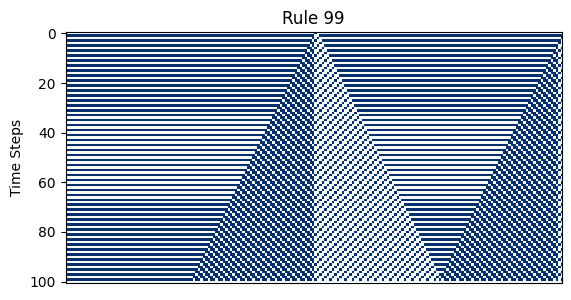

In [57]:
# Solution for Ex. 2 here...

rows = 1
columns = 6
array1 = np.zeros((rows, columns), dtype=np.uint8)
print(array1)

length = 11


class Cell1D:
  """ A Class that takes the input of various parameters and creates instances to allow the next state of the cellular atomata."""

  def __init__(self, int_rule, length = 10, start_state = single_centre_array(length), n_steps = 10):
    """Takes the input of self, the CA rule, and the CA start state as an array."""
    self.int_rule = int_rule
    self.start_state = start_state
    self.length = length
    self.n_steps = n_steps

  def int_to_binary_rule(self, int_rule):
    """Takes the input of the rule number and converts it to the binary form of the rule."""
    bin_list = []
    while int_rule > 0 :
      bin_list.insert(0,int_rule % 2)
      int_rule = int_rule // 2
    num_empty_zeros = 8 - (len(bin_list))
    #empty_zeros = [0] * num_empty_zeros
    #bin_list.insert(0, empty_zeros)
    for zero in range(num_empty_zeros):
      bin_list.insert(0, 0)
    return bin_list

  def flipped_int_to_binary_rule(self, bin_list):
    """Takes the input of the binary rule and converts it to the flipped version of the binary rule for simpler formatting of the time step."""
    flipped_bin_list = []
    for index in range(1, 9, 1):
      flipped_bin_list.append(bin_list[-index])
    return flipped_bin_list

  def binary_to_int(self, flipped_start_state):
    """Takes the input of the flipped binary array and converts it to its integer value."""
    start_state = flipped_start_state
    power = 7
    int_counter = 0
    for value in range(7, -1, -1):
      if start_state[value] == 1:
        int_counter = int_counter + (2**power)
      power = power - 1
    return int_counter

  def neighbourhoods(self, flipped_bin_list):
    """Takes the input of the start state and the inverted binary list and returns the set of neighbourhoods for the initial binary array."""
    neighbourhood_list = []
    index = 1
    print(flipped_bin_list)
    flipped_bin_list.append(0)
    flipped_bin_list.insert(0, 0)
    for value in flipped_bin_list[1:9]:
      neighbourhood_list.append([flipped_bin_list[index-1], flipped_bin_list[index], flipped_bin_list[index+1]])
      index = index + 1
    # for i in start_state:
    #   window = [i-1, i, i+1]
    return neighbourhood_list

  def neighbourhoods_to_neighbourhood_count(self, neighbourhood_list):
    """Takes the input of the list of neighbourhoods, and returns the binary count of the neighbourhood."""
    neighbourhood_count_list = []
    for neighbourhood in neighbourhood_list:
      assert len(neighbourhood) == 3 # Ensures that the neighbourhoods are the proper length.
      neighbour_count = (neighbourhood[0] * 4) +  (neighbourhood[1] * 2) + (neighbourhood[2] * 1)
      neighbourhood_count_list.append(neighbour_count)
    return neighbourhood_count_list

  def simulate(self, n_cells, n_steps, rule):
    """ Generate a CA with given number of cells, plot progression of rule for given number of time steps """
    start_state = single_centre_array(n_cells)
    # create a stack of "empty" state vectors, one for each time step
    ca_timesteps = np.vstack([start_state, np.zeros((self.n_steps, len(start_state)), dtype=np.uint8)])
    # run the simulation
    for t in range(1, self.n_steps):
        ca_timesteps[t] = transition(ca_timesteps[t-1], rule)
    return ca_timesteps

  def step(self, start_state, flipped_bin_list, neighbourhood_count_list):
    """Takes the input of the start state, the flipped form of the binary rule, and the sum of each neighbourhood to determine the next step of the CA."""
    #for rows in length:
    next_step = [0, 0, 0, 0, 0, 0, 0, 0]
    print("flipped rule:", flipped_bin_list)
    array1 = np.array(neighbourhood_count_list)
    index = 0
    for neighbourhood_sum in neighbourhood_count_list:
      print(neighbourhood_sum, flipped_bin_list[neighbourhood_sum])
      if flipped_bin_list[neighbourhood_sum] == 1:
        del (next_step[index])
        next_step.insert(index, 1)
      # if flipped_bin_list[rule_index] == 0:
      #   next_step[index] == 0
      index = index + 1
    return next_step

  def draw(self, length, start_state, next_step):
    plot_ca(next_step, axes=None, title='', cmap='Blues', **options)

    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set(
        title=title,
        ylabel='Time Steps',
    )

#rule_90 = get_lookup_table(90)


# def int_to_binary_rule(int_rule):
  #for number_places_exponent in range(7, -1, -1):
  #binary_result = int_rule // (2**number_places_exponent)
  #int_rule = int_rule - (2**number_places_exponent)
  #bin_list.append(binary_result)


# print(6 % 2)
# print(7//2**3)
# print(7//2**2)
# print(3//2**1)
# print(1//(2**0))

# Unit Tests

adam = Cell1D(6, length, single_centre_array(length), 1)

adam_int1 = Cell1D.int_to_binary_rule(adam, 10)
#Cell1D.int_to_binary_rule(adam, 100)

#Cell1D.flip_binary_rule(adam, 4)
Cell1D.flipped_int_to_binary_rule(adam, adam_int1)

ben = Cell1D(6, length, [0, 0, 0, 0, 0, 0, 0, 0], 1)
Cell1D.binary_to_int(ben, [0, 0, 0, 0, 0, 0, 0, 0])

carson = Cell1D(6, length, [1, 1, 1, 0, 1, 1, 1, 0], 100)
neighbourhoods1 = Cell1D.neighbourhoods(carson, [1, 1, 1, 0, 1, 1, 1, 0])
print(neighbourhoods1)
b = Cell1D.neighbourhoods_to_neighbourhood_count(carson, neighbourhoods1)
#ben.binary_to_int([0, 1, 1, 1, 0, 0, 0, 0])

#for number_places_exponent in range(7, -1, -1):
#int_rule // (2**number_places_exponent)

#print([0] * 8)

carson.step([1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 0, 0, 1, 0, 0, 1], b)

dean = Cell1D(90, length, single_centre_array(length), n_steps = 10)
int_rule = Cell1D.int_to_binary_rule(dean, 90)
flipped_rule = Cell1D.flipped_int_to_binary_rule(dean, int_rule)

# Draw CA

number = 99 # rule number

ed = Cell1D(number, length, single_centre_array(length), 100)

rule_number = get_lookup_table(number)
ca_timesteps = Cell1D.simulate(ed, 200, 100, rule_number)
plot_ca(ca_timesteps, title=f'Rule ' + str(number))

## Run some Experiments
With your new `Cell1D` class, run some experiments to explore the Elementary CA's.

Wolfram identifies 4 "classes" of Elementary Cellular Automata:
    a) rapidly converge to a uniform static state.
    b) rapidly converge to a stable repeating pattern.
    c) generate non-repeating, random states.
    d) generate chaos, with areas of repetitive or stable states, but also structures that interact in complex ways.

### Exercise 3

1. It will be convenient to abstract the steps needed to construct, simulate, and draw a CA - develop a small `experiment` function to do so.

2. Identify a rule that exemplifies each of the 4 CA classes.
   Create a 2x2 grid of plots that shows an example simulation for each class of CA side-by-side.
   You can simply re-purpose the example code below.

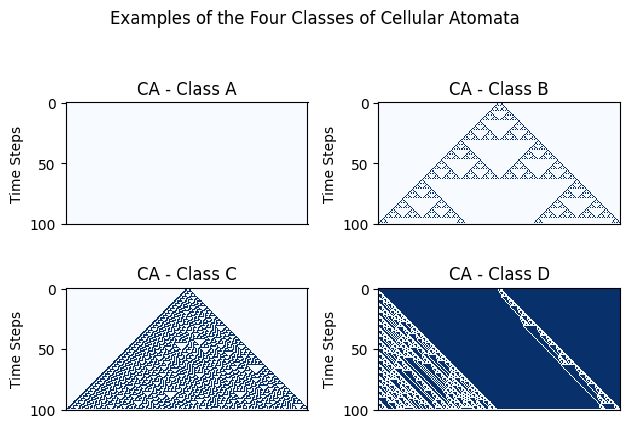

In [56]:
# Solution for Ex. 3 here...

ca_timesteps_list = []

# CA Class A - Rapidly converges to a uniform static state.

number1 = 0 # rule number

ed = Cell1D(6, length, single_centre_array(length), 100)

rule_number = get_lookup_table(number1)
ca_timesteps1 = Cell1D.simulate(ed, 200, 100, rule_number)
#plot_ca(ca_timesteps1, title=f'Rule ' + str(number1))

ca_timesteps_list.append(ca_timesteps1)

# CA Class B - Rapidly converges to a stable repeating pattern.

number2 = 18 # rule number

ed = Cell1D(6, length, single_centre_array(length), 100)

rule_number = get_lookup_table(number2)
ca_timesteps2 = Cell1D.simulate(ed, 200, 100, rule_number)
#plot_ca(ca_timesteps2, title=f'Rule ' + str(number2))

ca_timesteps_list.append(ca_timesteps2)

# CA Class C - Generates non-repeating random states.

number3 = 30 # rule number

ed = Cell1D(6, length, single_centre_array(length), 100)

rule_number = get_lookup_table(number3)
ca_timesteps3 = Cell1D.simulate(ed, 200, 100, rule_number)
#plot_ca(ca_timesteps3, title=f'Rule ' + str(number3))

ca_timesteps_list.append(ca_timesteps3)

# CA Class D - Generates chaos, with areas of repetetive stable states but also structures that interact in complex ways.

number4 = 225 # rule number

ed = Cell1D(6, length, single_centre_array(length), 100)

rule_number = get_lookup_table(number4)
ca_timesteps4 = Cell1D.simulate(ed, 200, 100, rule_number)
#plot_ca(ca_timesteps4, title=f'Rule ' + str(number4))

ca_timesteps_list.append(ca_timesteps4)

# Plots the four CA's at the same time.

def axes_layout(nrows=1, ncols=1, fig_title=None, **kwargs):
    """ layout nrows x ncols axes with sensible defaults.  kwargs passed directly to `plt.subplots()`"""
    kwargs = {**dict(layout='tight'), **kwargs}
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, **kwargs)
    if fig_title:
        fig.suptitle(fig_title)
    return axes

# Example: plot 4 plots in a 2x2 grid - plots are labelled so it's clear which is which.
axes = axes_layout(2, 2, fig_title='Examples of the Four Classes of Cellular Atomata')
index = 0
for ax, title in zip(axes.flat, ('CA - Class A', 'CA - Class B', 'CA - Class C', 'CA - Class D' )):
    plot_ca(ca_timesteps_list[index], axes=ax, title=f'{title}')
    index = index + 1

#### Sample code for creating a 2x2 grid of plots

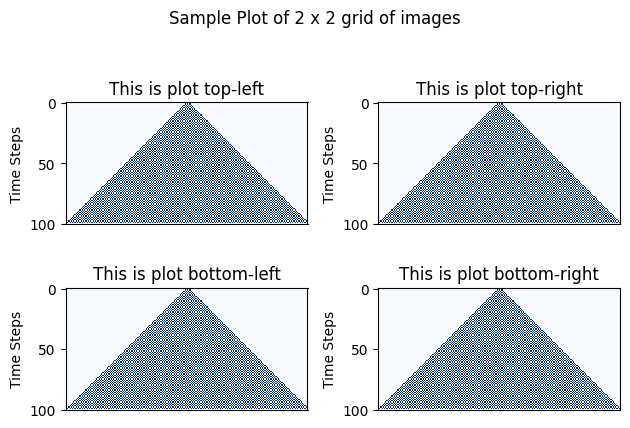

In [6]:
def axes_layout(nrows=1, ncols=1, fig_title=None, **kwargs):
    """ layout nrows x ncols axes with sensible defaults.  kwargs passed directly to `plt.subplots()`"""
    kwargs = {**dict(layout='tight'), **kwargs}
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, **kwargs)
    if fig_title:
        fig.suptitle(fig_title)
    return axes

# Example: plot 4 plots in a 2x2 grid - plots are labelled so it's clear which is which.
axes = axes_layout(2, 2, fig_title='Sample Plot of 2 x 2 grid of images')
for ax, title in zip(axes.flat, ('top-left', 'top-right', 'bottom-left', 'bottom-right' )):
    plot_ca(ca_timesteps, axes=ax, title=f'This is plot {title}')

## Exercise 4:  Thought Experiments
Think about some of the questions that arise from this experiment.  Provide some concise answer that capture you thinking...
1. What is it about these experiments that requires computation?
Is there some other means by which we could conduct experiments like this?

2. What conclusions can you draw about the conditions under which complex behaviours can arise?
Do you think these conclusions are mostly intuitive or counter-intuitive?

3. What lessons might we take about studying complex phenomena in the real world from our study of elementary cellular automata?

### Answers
(concise, point-form -- there are no wrong answers, I'd just like to hear what you think)

1. These experiments require computation because there is no closed form solution for all rules, especially the rules in class 3 and 4.  The only way to know what happens in the rules is to actually complete the timesteps of the CA.

2. Complex behaviours are arise out of simple situations.  For me, this is counter-intuitive.  

3. It seems to me that we can study many complex processes in the real world from our study of elementary cellular atomata, that appear to be random and don't have a closed-form solution.  